## 반려동물 품종 인식 모델

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [3]:
Path.BASE_PATH = path

In [4]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [5]:
(path/"images").ls()

(#7393) [Path('images/Abyssinian_1.jpg'),Path('images/Abyssinian_10.jpg'),Path('images/Abyssinian_100.jpg'),Path('images/Abyssinian_100.mat'),Path('images/Abyssinian_101.jpg'),Path('images/Abyssinian_101.mat'),Path('images/Abyssinian_102.jpg'),Path('images/Abyssinian_102.mat'),Path('images/Abyssinian_103.jpg'),Path('images/Abyssinian_104.jpg')...]

In [6]:
fname = (path/"images").ls()[0]

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [8]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [9]:
item_tfms=Resize(460),
batch_tfms=aug_transforms(size=224, min_scale=0.75)

### 데이터블록 검사와 디버깅

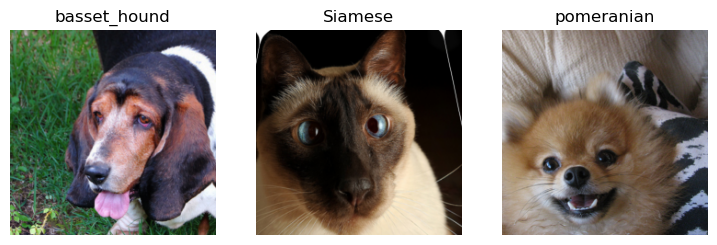

In [16]:
dls.show_batch(nrows=1, ncols=3)

In [17]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\user\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\user\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': F

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 375, 500])
	Item at index 1 has shape: torch.Size([3, 199, 300])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

In [19]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

C:\Users\user\.conda\envs\geopandas\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.524426,0.294610,0.096752,46:44


epoch,train_loss,valid_loss,error_rate,time
0,0.522410,0.288649,0.098106,1:17:56
1,0.309430,0.199222,0.068336,1:17:14


### 교차 엔트로피 손실

#### 활성 및 레이블 확인

In [20]:
x,y = dls.one_batch()

In [21]:
y

TensorCategory([ 1, 30,  1,  6, 31, 25, 28,  8,  4, 30,  6, 30, 28,  1, 35, 30,
                34,  2, 20, 30, 17,  3, 15, 25,  9, 25, 16, 11,  3, 30,  2, 15,
                18,  4, 19, 24,  4, 34,  6, 33, 13, 30, 16, 24,  9, 14,  5, 28,
                12,  2, 25,  6, 29, 25, 24,  9, 20,  6, 16,  7, 29, 28, 14, 11])

In [22]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

TensorBase([6.8164e-03, 9.8684e-01, 1.6509e-05, 1.0295e-05, 2.9766e-05,
            3.5680e-03, 9.6514e-04, 1.7201e-05, 1.9377e-05, 7.3782e-06,
            3.3306e-04, 3.8282e-04, 1.3963e-05, 1.6338e-04, 4.0511e-05,
            1.3293e-05, 1.0424e-05, 4.2581e-05, 2.4257e-05, 9.7008e-06,
            8.9003e-05, 1.0787e-06, 5.3673e-06, 2.2751e-05, 1.3370e-05,
            2.2640e-06, 2.5041e-04, 9.5768e-06, 9.4856e-05, 9.7657e-06,
            8.1571e-06, 1.5551e-06, 8.8846e-06, 8.0022e-05, 9.6477e-06,
            4.9124e-06, 6.6318e-05])

In [24]:
len(preds[0]),preds[0].sum()

(37, TensorBase(1.))

#### 소프트맥스

In [31]:
from fastbook import *

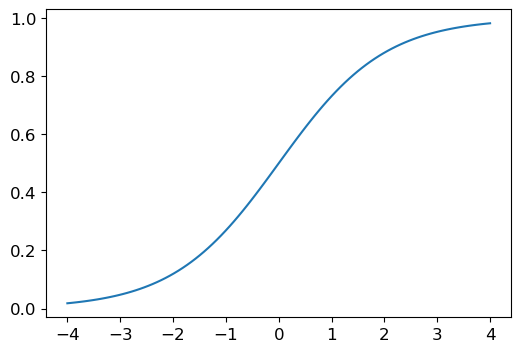

In [32]:
plot_function(torch.sigmoid, min=-4,max=4)

In [33]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [34]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [35]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [36]:
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [37]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

#### 로그 가능도

In [38]:
def mnist_loss(inputs, targets):
    inputs = inputs.sigmoid()
    return torch.where(targets==1, 1-inputs, inputs).mean()

In [39]:
targ = tensor([0,1,0,1,1,0])

In [40]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [41]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [42]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [43]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

#### 로그 취하기

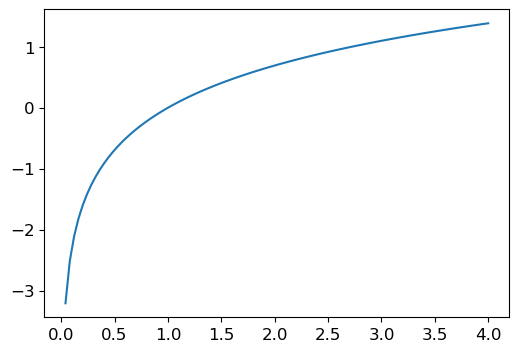

In [44]:
plot_function(torch.log, min=0,max=4)

In [45]:
loss_func = nn.CrossEntropyLoss()

In [46]:
loss_func(acts, targ)

tensor(1.8045)

In [47]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [48]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

### 모델 해석

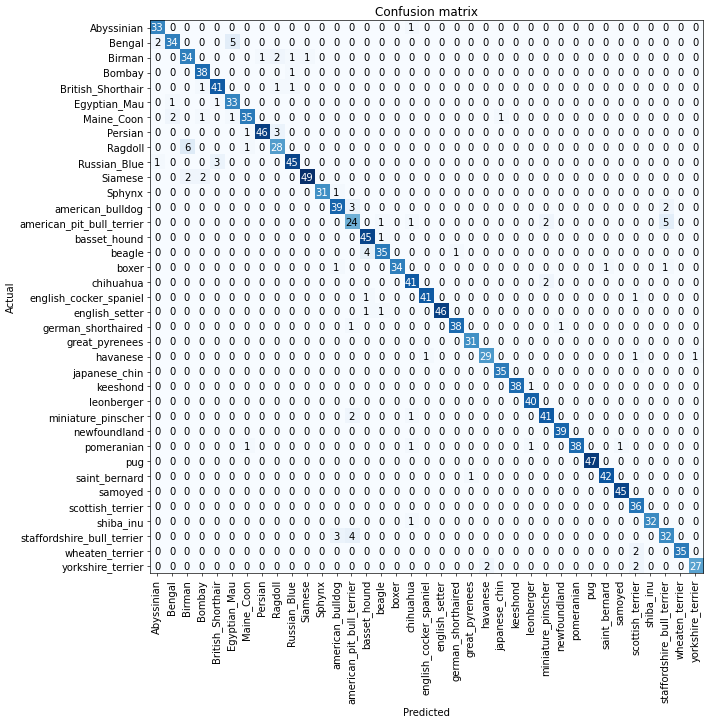

In [49]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [50]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

### 모델 향상하기

In [51]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.669974,4.450734,0.465494,46:12


epoch,train_loss,valid_loss,error_rate,time
0,3.966975,2.589282,0.722598,58:52


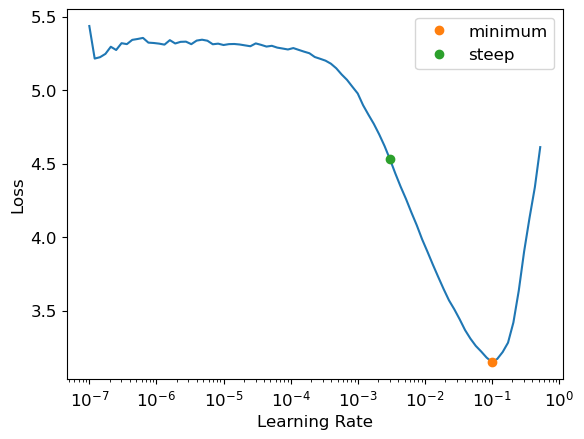

In [52]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [53]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 3.02e-03


In [54]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.322277,0.293442,0.102842,1:00:30


epoch,train_loss,valid_loss,error_rate,time
0,0.548982,0.496454,0.138024,1:09:50
1,0.349017,0.210712,0.070365,1:08:58


In [55]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.150714,0.341819,0.111637,1:02:53
1,0.536161,0.290908,0.089310,57:09
2,0.334324,0.223986,0.075101,53:29


In [56]:
learn.unfreeze()

SuggestedLRs(valley=6.918309736647643e-06)

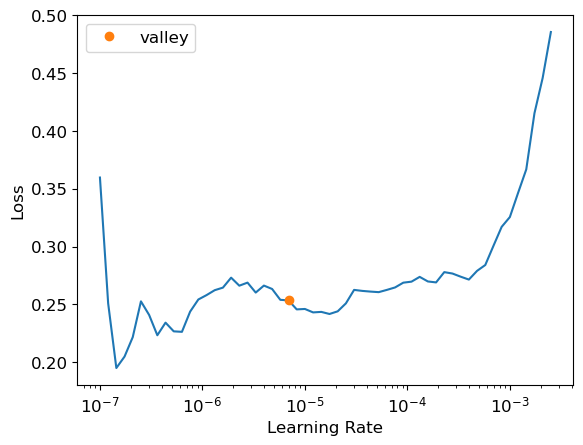

In [57]:
learn.lr_find()

In [58]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.269591,0.215898,0.068336,2:08:25
1,0.247261,0.210218,0.069689,1:27:58
2,0.228575,0.198345,0.064953,1:25:38
3,0.202112,0.195569,0.062923,1:28:45
4,0.171870,0.197671,0.063599,1:55:12
5,0.177884,0.193562,0.062923,1:18:20


#### 차별적 학습률

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

C:\Users\user\.conda\envs\geopandas\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\.conda\envs\geopandas\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.137369,0.348834,0.110961,20:03
1,0.525356,0.279370,0.083897,20:05
2,0.334064,0.225802,0.065629,19:55


epoch,train_loss,valid_loss,error_rate,time
0,0.259325,0.221143,0.064276,26:25
1,0.255591,0.208737,0.062923,26:02
2,0.239205,0.205120,0.055480,13:22:53
3,0.229825,0.199287,0.057510,51:39:05
4,0.189757,0.201397,0.055480,17:48
5,0.167362,0.195992,0.054127,16:40
6,0.146306,0.187749,0.052774,16:57
7,0.145689,0.191037,0.054804,17:00
8,0.132474,0.187491,0.053451,16:30
9,0.133840,0.185883,0.054127,16:41


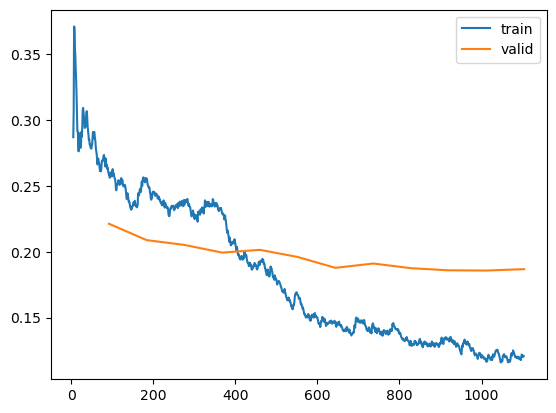

In [11]:
learn.recorder.plot_loss()

#### 더 깊은 구조

In [13]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.256570,0.287697,0.088633,24:34
1,0.587190,0.314605,0.101489,23:24
2,0.420849,0.280753,0.084574,23:15


epoch,train_loss,valid_loss,error_rate,time
0,0.255214,0.257512,0.072395,27:37
1,0.303118,0.331645,0.096752,27:35
2,0.232706,0.302985,0.085927,27:28
3,0.147012,0.233761,0.065629,27:29
4,0.080009,0.204992,0.061570,27:27
5,0.051587,0.199724,0.059540,27:03
